#Assignment 3
* Download the Dataset : https://drive.google.com/file/d/1xkynpL15pt6KT3YSlDimu4A5iRU9qYck/view
* Image Augmentation
* Create Model
* Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)
* Compile The Model
* Fit The Model
* Save The Model
* Test The Model

#Importing Packages

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
import numpy as np
import warnings
#Supressing warnings
warnings.filterwarnings('ignore')

# 2.Image Augmentation

In [51]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/IBM/Flowers-Dataset',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4141 images belonging to 5 classes.


In [52]:
# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/IBM/Flower_Training',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 204 images belonging to 5 classes.


#3.Create Model

In [53]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

#4. Compile the Model

In [54]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#5. Fit the Model

In [55]:
Flower_model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 10,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/10
42/42 [==============================] - 567s 14s/step - loss: 1.9592 - accuracy: 0.3700 - val_loss: 1.1356 - val_accuracy: 0.5490
Epoch 2/10
42/42 [==============================] - 26s 618ms/step - loss: 1.1221 - accuracy: 0.5412 - val_loss: 1.1446 - val_accuracy: 0.6422
Epoch 3/10
42/42 [==============================] - 26s 612ms/step - loss: 1.0173 - accuracy: 0.6042 - val_loss: 1.1835 - val_accuracy: 0.6225
Epoch 4/10
42/42 [==============================] - 26s 611ms/step - loss: 0.9552 - accuracy: 0.6264 - val_loss: 1.0033 - val_accuracy: 0.6765
Epoch 5/10
42/42 [==============================] - 26s 620ms/step - loss: 0.8832 - accuracy: 0.6619 - val_loss: 0.9993 - val_accuracy: 0.7059
Epoch 6/10
42/42 [==============================] - 26s 621ms/step - loss: 0.8373 - accuracy: 0.6783 - val_loss: 0.9690 - val_accuracy: 0.7206
Epoch 7/10
42/42 [==============================] - 26s 615ms/step - loss: 0.8125 - accuracy: 0.6923 - val_loss: 0.8731 - val_accuracy: 0.7059


#7. Save the model

In [56]:
Flower_model.save('Flower.h5')

#8. Test the model

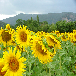

In [60]:
test_img=image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/sunflower/200557977_bf24d9550b.jpg',target_size=(76,76))
test_img

In [61]:
x=image.img_to_array(test_img)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category=['daisy','dandelion','rose','sunflower','tulip']
Prediction_category[predicted]

'sunflower'

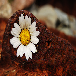

In [59]:
test_img1=image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/daisy/1140299375_3aa7024466.jpg',target_size=(76,76))
test_img1

In [46]:
x=image.img_to_array(test_img1)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

'daisy'

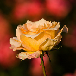

In [65]:
test_img2=image.load_img('/content/drive/MyDrive/IBM/Flowers-Dataset/rose/7251352826_69b62cba2c_m.jpg',target_size=(76,76))
test_img2

In [66]:
x=image.img_to_array(test_img2)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

'rose'